In [ ]:
pip install pyLDAvis

In [ ]:
from helper import *

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from numpy import array

In [ ]:
df = pd.read_csv("/content/tanggal 16 after dupp.csv", encoding="utf-8")

In [ ]:
df

,ymdhm,created_at,tweet,cleaned1,after slang,cleaned2,after stopword
0,5/16/2021 0:00,5/15/2021 17:00,Kapolda Jawa Timur Irjen Pol Nico Afrinta meng...,kapolda jawa timur irjen pol nico afrinta meng...,kapolda jawa timur irjen pol nico afrinta meng...,kapolda jawa timur irjen pol nico afrinta meng...,kapolda jawa timur irjen pol nico afrinta meng...
1,5/16/2021 0:00,5/15/2021 17:00,RT @txtdariteteh: Mau posting foto keluarga pa...,rt mau posting foto keluarga pas lebaran tapi ...,rt mau posting foto keluarga pas lebaran tapi ...,rt mau posting foto keluarga pas lebaran tapi ...,mau posting foto keluarga pas lebaran sebagian...
2,5/16/2021 0:00,5/15/2021 17:00,@bertanyarl 150k doang keluarga gw taun ini g ...,150k doang keluarga gw taun ini g pd mudik by...,150k doang keluarga gue tahun ini enggak pada...,doang keluarga gue tahun ini enggak pada mudik...,doang keluarga gue tahun enggak pada mudik byeee
3,5/16/2021 0:00,5/15/2021 17:00,"Ngeeeen***, urg teu bisa mudik tapi tempat wis...",ngeeeen urg teu bisa mudik tapi tempat wisata ...,ngeeeen urg teu bisa mudik tapi tempat wisata ...,ngeeeen urg teu bisa mudik tapi tempat wisata ...,ngeeeen urg teu bisa mudik tempat wisata pinuh...
4,5/16/2021 0:00,5/15/2021 17:00,Terus preinternship jd online lagi gabisa offl...,terus preinternship jd online lagi gabisa offl...,terus preinternship jadi online lagi enggak bi...,terus preinternship jadi online lagi enggak bi...,terus preinternship jadi online enggak bisa of...
...,...,...,...,...,...,...,...
7705,5/16/2021 22:28,5/16/2021 15:26,plus... SuShow adalah candu. kalo udah nonton ...,plus sushow adalah candu kalo udah nonton seka...,plus sushow adalah candu kalo sudah menonton s...,plus sushow adalah candu kalo sudah menonton s...,plus sushow candu kalo menonton pasti bakalan ...
7706,5/16/2021 22:28,5/16/2021 15:26,@dewahoya Duta mudik wkwk,duta mudik wkwk,duta mudik wkwk,duta mudik wkwk,duta mudik wkwk
7707,5/16/2021 22:28,5/16/2021 15:26,Kirain gabener rupanya emang bener liburnya di...,kirain gabener rupanya emang bener liburnya di...,mengira gabener rupanya memang benar liburnya ...,mengira gabener rupanya memang benar liburnya ...,mengira gabener rupanya benar liburnya dipoton...
7708,5/16/2021 22:29,5/16/2021 15:28,Total kendaraan yang diputar balik sebanyak 20...,total kendaraan yang diputar balik sebanyak 20...,total kendaraan yang diputar balik sebanyak 20...,total kendaraan yang diputar balik sebanyak ...,total kendaraan diputar balik sebanyak unit pe...


In [ ]:
text = df['after stopword']
text_list =  [i.split() for i in text]
print(len(text_list))

7710


In [ ]:
text_list

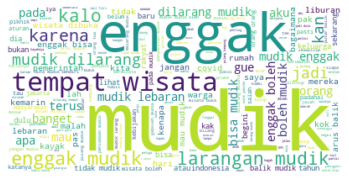

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

text = df['after stopword']
text = " ".join(review for review in text)
wd = wd(background_color="white").generate(text)

plt.imshow(wd, interpolation='bilinear', )
plt.axis("off")
plt.show()

In [ ]:
from gensim.models import Phrases
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)

In [ ]:
from gensim import corpora, models
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)
print(dictionary)

Dictionary(2211 unique tokens: ['balik', 'irjen', 'jawa', 'jawa_timur', 'kapolda']...)


In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

print(len(doc_term_matrix))
print(doc_term_matrix[100])

tfidf = models.TfidfModel(doc_term_matrix)
corpus_tfidf = tfidf[doc_term_matrix]

7710
[(413, 1), (427, 1), (428, 1)]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, 
                         num_topics=num_topics, iterations=100, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

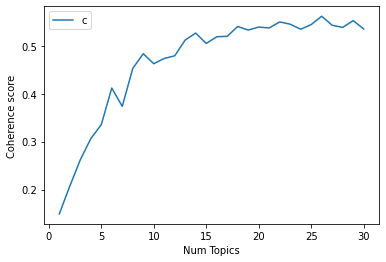

In [ ]:
start=1
limit=31
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)

import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.1493
Num Topics = 2  has Coherence Value of 0.2072
Num Topics = 3  has Coherence Value of 0.262
Num Topics = 4  has Coherence Value of 0.3062
Num Topics = 5  has Coherence Value of 0.3353
Num Topics = 6  has Coherence Value of 0.4117
Num Topics = 7  has Coherence Value of 0.3736
Num Topics = 8  has Coherence Value of 0.4526
Num Topics = 9  has Coherence Value of 0.4833
Num Topics = 10  has Coherence Value of 0.4625
Num Topics = 11  has Coherence Value of 0.4734
Num Topics = 12  has Coherence Value of 0.479
Num Topics = 13  has Coherence Value of 0.512
Num Topics = 14  has Coherence Value of 0.5263
Num Topics = 15  has Coherence Value of 0.5047
Num Topics = 16  has Coherence Value of 0.5186
Num Topics = 17  has Coherence Value of 0.5196
Num Topics = 18  has Coherence Value of 0.5401
Num Topics = 19  has Coherence Value of 0.5326
Num Topics = 20  has Coherence Value of 0.5389
Num Topics = 21  has Coherence Value of 0.537
Num Topics = 22  has Coher

In [ ]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=14, random_state=42)
pprint(model.print_topics())

[(0,
  '0.014*"besok" + 0.012*"melakukan" + 0.011*"lu" + 0.010*"iki" + '
  '0.010*"pulang" + 0.010*"kendaraan_diputarbalik" + 0.009*"aku" + '
  '0.009*"protokol_kesehatan" + 0.009*"tidak" + 0.009*"larangan"'),
 (1,
  '0.013*"tahun" + 0.013*"soalnya" + 0.012*"mari_kita" + '
  '0.012*"anjuran_pemerintah" + 0.011*"laut" + 0.011*"enak" + 0.009*"kerja" + '
  '0.009*"saya" + 0.009*"marah" + 0.009*"online"'),
 (2,
  '0.021*"pos_penyekatan" + 0.013*"wkwk" + 0.011*"baca" + '
  '0.011*"positif_covid" + 0.011*"wisata_lokal" + 0.010*"pos" + '
  '0.010*"tempat_wisata" + 0.009*"pemerintah_pusat" + 0.009*"surat_bebas" + '
  '0.008*"ternyata"'),
 (3,
  '0.011*"tanggal_mei" + 0.011*"wkwkw" + 0.010*"ketemu" + 0.010*"puter_balik" '
  '+ 0.010*"kayak" + 0.009*"wna_china" + 0.009*"wna" + 0.009*"kayak_begini" + '
  '0.009*"ora" + 0.007*"sini"'),
 (4,
  '0.016*"wisata_dibuka" + 0.016*"mau" + 0.013*"penyebaran_covid" + '
  '0.012*"aku" + 0.011*"arus_balik" + 0.010*"solo" + 0.010*"ra" + '
  '0.010*"disuruh_put

In [ ]:
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.014*"besok" + 0.012*"melakukan" + 0.011*"lu" + 0.010*"iki" + 0.010*"pulang" + 0.010*"kendaraan_diputarbalik" + 0.009*"aku" + 0.009*"protokol_kesehatan" + 0.009*"tidak" + 0.009*"larangan"
Topic: 1 Word: 0.013*"tahun" + 0.013*"soalnya" + 0.012*"mari_kita" + 0.012*"anjuran_pemerintah" + 0.011*"laut" + 0.011*"enak" + 0.009*"kerja" + 0.009*"saya" + 0.009*"marah" + 0.009*"online"
Topic: 2 Word: 0.021*"pos_penyekatan" + 0.013*"wkwk" + 0.011*"baca" + 0.011*"positif_covid" + 0.011*"wisata_lokal" + 0.010*"pos" + 0.010*"tempat_wisata" + 0.009*"pemerintah_pusat" + 0.009*"surat_bebas" + 0.008*"ternyata"
Topic: 3 Word: 0.011*"tanggal_mei" + 0.011*"wkwkw" + 0.010*"ketemu" + 0.010*"puter_balik" + 0.010*"kayak" + 0.009*"wna_china" + 0.009*"wna" + 0.009*"kayak_begini" + 0.009*"ora" + 0.007*"sini"
Topic: 4 Word: 0.016*"wisata_dibuka" + 0.016*"mau" + 0.013*"penyebaran_covid" + 0.012*"aku" + 0.011*"arus_balik" + 0.010*"solo" + 0.010*"ra" + 0.010*"disuruh_putar" + 0.009*"kasihan" + 0.008*"l

In [ ]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])

df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
print(df)

None


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [ ]:
import gensim

data = gensimvis.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-tgl14-18.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.174330 -0.032238       1        1  10.081445
9     -0.068694 -0.034460       2        1   8.214840
7     -0.166069 -0.071681       3        1   7.803171
10     0.099377 -0.061775       4        1   7.303279
6     -0.023755  0.151133       5        1   7.221075
8     -0.057777 -0.052284       6        1   6.990146
3     -0.056242  0.010370       7        1   6.910361
4      0.056171  0.169411       8        1   6.898877
13     0.022370 -0.010639       9        1   6.683430
11     0.028926 -0.078227      10        1   6.497158
2      0.109770 -0.033200      11        1   6.428985
0     -0.039216  0.034186      12        1   6.411618
12    -0.058668  0.083803      13        1   6.369928
1     -0.020521 -0.074400      14        1   6.185688, topic_info=                Term        Freq       Total Category  logprob  loglift
33     tempat_wisata 

In [ ]:
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.174330 -0.032238       1        1  10.081445
9     -0.068694 -0.034460       2        1   8.214840
7     -0.166069 -0.071681       3        1   7.803171
10     0.099377 -0.061775       4        1   7.303279
6     -0.023755  0.151133       5        1   7.221075
8     -0.057777 -0.052284       6        1   6.990146
3     -0.056242  0.010370       7        1   6.910361
4      0.056171  0.169411       8        1   6.898877
13     0.022370 -0.010639       9        1   6.683430
11     0.028926 -0.078227      10        1   6.497158
2      0.109770 -0.033200      11        1   6.428985
0     -0.039216  0.034186      12        1   6.411618
12    -0.058668  0.083803      13        1   6.369928
1     -0.020521 -0.074400      14        1   6.185688, topic_info=                Term        Freq       Total Category  logprob  loglift
33     tempat_wisata  182.000000  182.000000  Default  30.0000  30.0000
49      enggak_boleh  132.000000  132.000000  Default  29.0000  29.0000
1011      arus_balik   83.000000   83.000000  Default  28.0000  28.0000
338        jadi_duta   39.000000   39.000000  Default  27.0000  27.0000
437   pulang_kampung   37.000000   37.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
21             orang    7.236525   85.318263  Topic14  -5.0439   0.3157
67          dilarang    7.130812   98.995295  Topic14  -5.0587   0.1523
45               aku    7.020304   84.570777  Topic14  -5.0743   0.2941
151            tidak    6.911573   80.811593  Topic14  -5.0899   0.3240
300            masuk    6.478415   32.910492  Topic14  -5.1546   1.1576

[823 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
898       1  0.783011            aa
2069     14  0.877485      abangnya
2102     13  0.734347          acak
1620      5  0.904079          adik
1220     10  0.765194     airlangga
...     ...       ...           ...
1454     11  0.822974      wna_cina
2025      8  0.889042           woi
2138     12  0.886658           wow
1125      9  0.375013  ziarah_kubur
1125     11  0.525018  ziarah_kubur

[2148 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 8, 11, 7, 9, 4, 5, 14, 12, 3, 1, 13, 2])

In [ ]:
# Compute Perplexity
print('\nPerplexity : ', model.log_perplexity(corpus_tfidf)) 

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=model, texts=text_list, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5262830332169093


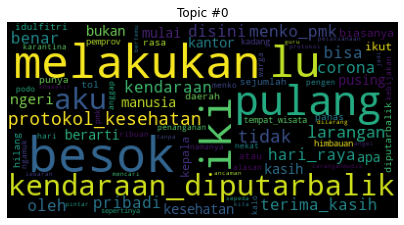

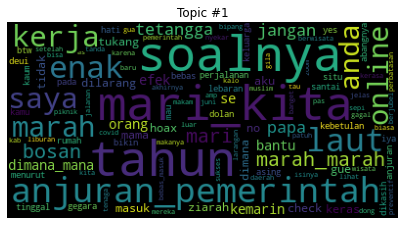

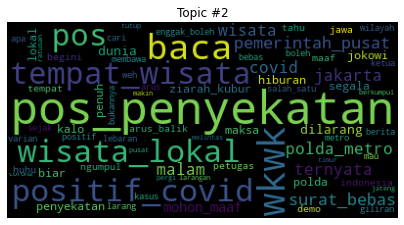

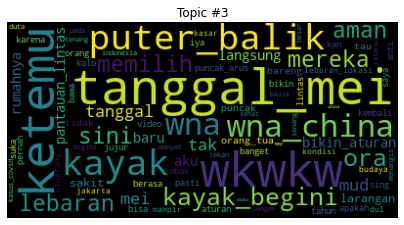

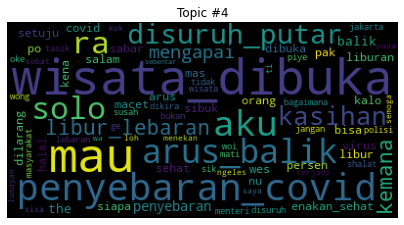

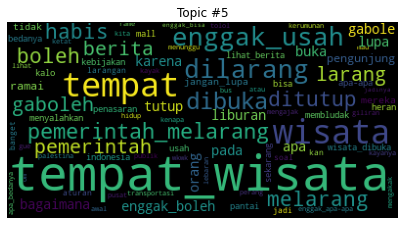

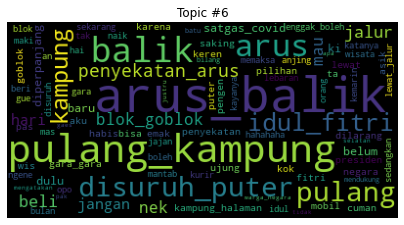

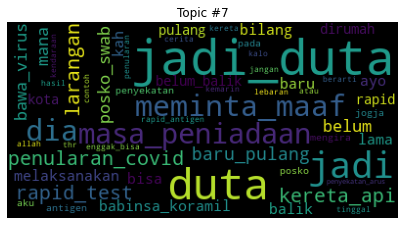

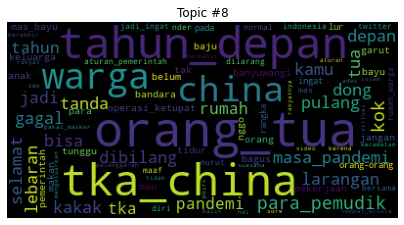

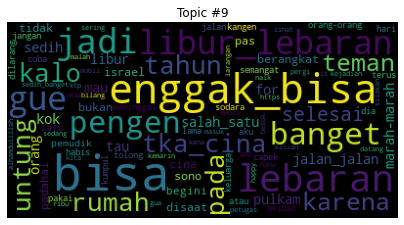

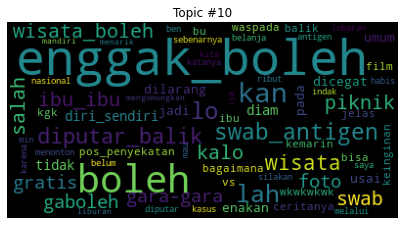

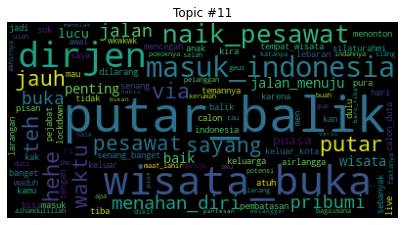

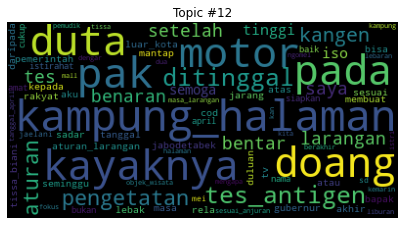

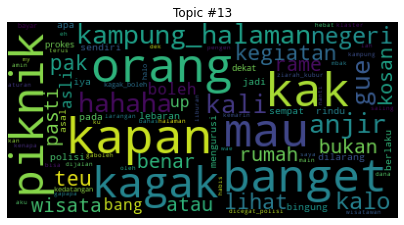

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, min_font_size=6).fit_words(dict(model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("wcld-topic-#"+str(t)+".png", facecolor='k', bbox_inches='tight')

plt.show()